In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
app_data = pd.read_csv(
    "./data/lsapp.tsv.gz",
    sep="\t",
    names=["user_id", "session_id", "timestamp", "app_name", "event_type"],
    parse_dates=["timestamp"],
    skiprows=1)
    

In [3]:
app_data.shape

(3658590, 5)

In [4]:
app_data.head()

,user_id,session_id,timestamp,app_name,event_type
0,0.0,1.0,2018-01-16 06:01:05,Minesweeper Classic (Mines),Opened
1,0.0,1.0,2018-01-16 06:01:05,Minesweeper Classic (Mines),Closed
2,0.0,1.0,2018-01-16 06:01:07,Minesweeper Classic (Mines),Opened
3,0.0,1.0,2018-01-16 06:01:07,Minesweeper Classic (Mines),Closed
4,0.0,1.0,2018-01-16 06:01:08,Minesweeper Classic (Mines),Opened


### Check the missing values in each feature (column)

In [7]:
app_data.isnull().sum()

user_id       1
session_id    1
timestamp     1
app_name      1
event_type    1
dtype: int64

### Drop the missing value records

In [8]:
app_data = app_data.dropna()

In [9]:
app_data["user_id"] = app_data["user_id"].astype(int)
app_data["session_id"] = app_data["session_id"].astype(int)

app_data.dtypes

user_id                int32
session_id             int32
timestamp     datetime64[ns]
app_name              object
event_type            object
dtype: object

In [10]:
app_data["event_type"].value_counts(normalize=True)  # percentage of events in dataset

event_type
Opened              0.457351
Closed              0.455644
User Interaction    0.085779
Broken              0.001226
Name: proportion, dtype: float64

In [11]:
app_data = app_data[app_data["event_type"] != "Broken"]  # drop a 'Broken' event

In [12]:
app_data["event_type"].value_counts(normalize=True)

event_type
Opened              0.457913
Closed              0.456203
User Interaction    0.085884
Name: proportion, dtype: float64

In [13]:
app_data["user_id"].nunique()  # number of unique users

292

In [14]:
app_data["app_name"].nunique()  # number of unique apps

87

In [15]:
app_data["timestamp"].agg(["min", "max"])  # date range 

min   2017-09-09 17:16:06
max   2018-05-17 08:42:29
Name: timestamp, dtype: datetime64[ns]

### How many unique sessions for each user?

In [16]:
sessions_per_user = (
    app_data
    .groupby("user_id")["session_id"].nunique()
)

In [17]:
sessions_per_user

user_id
0       241
1        88
2        62
3        72
4        45
       ... 
287      72
288       3
289     232
290    3284
291      97
Name: session_id, Length: 292, dtype: int64

In [18]:
sessions_per_user.describe()

count     292.000000
mean      261.113014
std       484.984555
min         1.000000
25%        45.750000
50%        95.500000
75%       289.000000
max      5153.000000
Name: session_id, dtype: float64

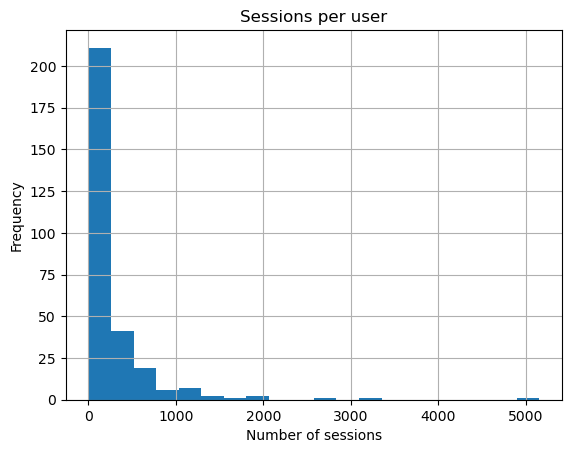

In [19]:
fig, axis = plt.subplots()

_ = sessions_per_user.hist(bins=20, ax=axis)

_ = axis.set(title="Sessions per user",
             xlabel="Number of sessions",
             ylabel="Frequency"
            )

plt.savefig("sessions_per_user.png")
plt.show()

### Look for top users with the highest number of sessions

In [20]:
sessions_per_user.sort_values(ascending=False).head(5)

user_id
138    5153
290    3284
192    2763
31     1885
204    1851
Name: session_id, dtype: int64

In [21]:
app_data[app_data["user_id"] == 138].head(10)

,user_id,session_id,timestamp,app_name,event_type
1782158,138,28802,2018-01-04 05:21:59,Phone,Opened
1782159,138,28802,2018-01-04 05:21:59,Phone,Closed
1782160,138,28802,2018-01-04 05:21:59,Phone,Opened
1782161,138,28802,2018-01-04 05:22:25,Phone,Closed
1782162,138,28802,2018-01-04 05:22:26,Telegram,User Interaction
1782163,138,28802,2018-01-04 05:24:54,Telegram,User Interaction
1782164,138,28802,2018-01-04 05:28:53,Telegram,User Interaction
1782165,138,28802,2018-01-04 05:29:02,Facebook Messenger,Opened
1782166,138,28802,2018-01-04 05:30:02,Facebook Messenger,Closed
1782167,138,28803,2018-01-04 05:35:04,Twitter,User Interaction


In [22]:
# investigating duplicate event records
app_data.duplicated().sum() / len(app_data)

0.5974564489680644

### About 60% of our data is an exact duplicate of another row.

In [23]:
# drop closed events 
closed_dropped = app_data.loc[app_data["event_type"] != "Closed", :]

print(len(closed_dropped))
print(len(closed_dropped) / len(app_data))
print(closed_dropped.duplicated().sum() / len(closed_dropped))

1987090
0.543796783014386
0.5991560523177109


### After we dropped Closed events, we  still have nearly 60% exact duplicates.

In [24]:
# drop duplication 
app_data_reduced = closed_dropped.drop_duplicates()
len(app_data_reduced)

796513

### Just under 800,000 records after cleaning orginal dataset.

In [25]:
# events after duplicate records were removed
app_data_reduced.head(10)

In [26]:
app_data_reduced.head(10)

,user_id,session_id,timestamp,app_name,event_type
0,0,1,2018-01-16 06:01:05,Minesweeper Classic (Mines),Opened
2,0,1,2018-01-16 06:01:07,Minesweeper Classic (Mines),Opened
4,0,1,2018-01-16 06:01:08,Minesweeper Classic (Mines),Opened
8,0,1,2018-01-16 06:01:09,Minesweeper Classic (Mines),Opened
10,0,1,2018-01-16 06:03:44,Minesweeper Classic (Mines),Opened
12,0,1,2018-01-16 06:03:45,Minesweeper Classic (Mines),Opened
14,0,1,2018-01-16 06:03:47,Minesweeper Classic (Mines),Opened
16,0,1,2018-01-16 06:03:49,Minesweeper Classic (Mines),Opened
20,0,1,2018-01-16 06:03:51,Minesweeper Classic (Mines),Opened
22,0,1,2018-01-16 06:03:52,Minesweeper Classic (Mines),Opened


In [27]:
app_data_reduced.groupby("session_id")["user_id"].head()

0            0
2            0
4            0
8            0
10           0
          ... 
3658581    291
3658583    291
3658585    291
3658587    291
3658588    291
Name: user_id, Length: 255571, dtype: int32

In [28]:
(
    app_data_reduced
    .groupby("session_id")["user_id"]
    .nunique()
    .loc[lambda x: x > 1]
)

Series([], Name: user_id, dtype: int64)

### There are no session IDs across multiple users.

In [29]:
sessions = (
    app_data_reduced.groupby(["user_id", "session_id"])
    .agg(start=("timestamp", "min"),
         end=("timestamp", "max")).reset_index()
    .assign(
        duration_mins=lambda _df: (_df["end"] - _df["start"]).dt.seconds/60
)
)

### A snapshot of user sessions and their duration in minutes

In [30]:
sessions.head()

,user_id,session_id,start,end,duration_mins
0,0,1,2018-01-16 06:01:05,2018-01-16 06:04:17,3.200000
1,0,2,2018-01-16 06:25:54,2018-01-16 06:26:26,0.533333
2,0,3,2018-01-16 06:35:35,2018-01-16 06:35:35,0.000000
3,0,4,2018-01-16 07:15:56,2018-01-16 07:21:44,5.800000
4,0,5,2018-01-16 08:02:05,2018-01-16 08:04:11,2.100000


### Produce the average duration_mins in sessions for each user

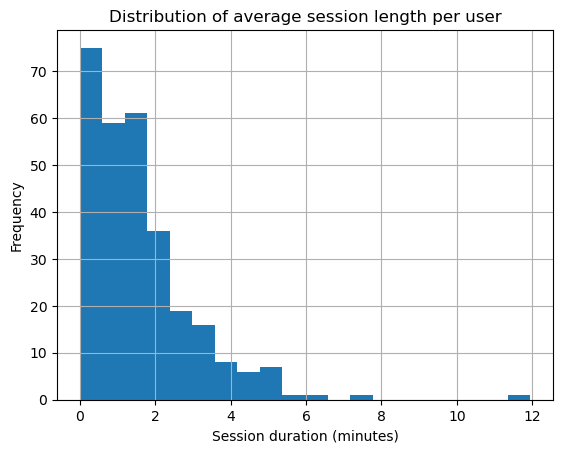

In [32]:
fig, axis = plt.subplots()

avg_session_by_user = (
    sessions.groupby("user_id")["duration_mins"].median()
)
 
_ =  avg_session_by_user.hist(bins=20, ax=axis) 

axis.set(
    title="Distribution of average session length per user",
    xlabel="Session duration (minutes)",
    ylabel="Frequency"
)

plt.savefig("average_session_length")
plt.show()

### Most users sessions last less than two minutes.

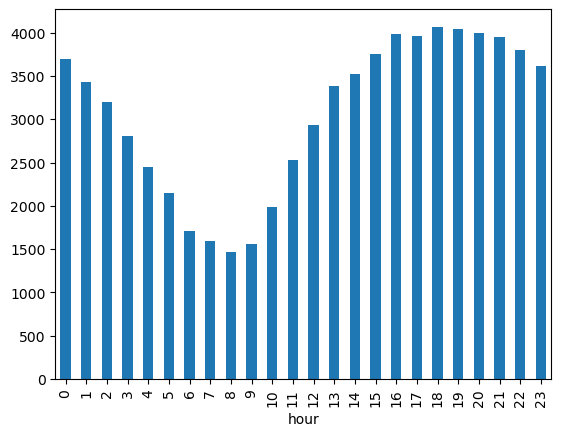

In [33]:
# isolate just the hour in which using app began

sessions["hour"] = sessions["start"].dt.hour

_ = (
    sessions["hour"]
    .value_counts()
    .sort_index()
    .plot(kind="bar")
)

plt.savefig("dist_of_startHour_app")
plt.show()

### Most browsing sessions start in the late afternoon/early evening.

In [34]:
# return possibly multiple values of the mode for each user
def get_modes(group):
    mode_hours = group['hour'].mode()
    return pd.DataFrame( { 'user_id': group['user_id'].iloc[0],
                            'most_frequent_hour' : mode_hours
                         }
                       )

In [35]:
most_frequent_hours = (
    sessions
    .groupby("user_id")
    .apply(get_modes) #B
    .rename(columns={"user_id": "duplicate_user_id"})
    .reset_index()
    .drop(columns=["level_1", "duplicate_user_id"])
)

In [36]:
most_frequent_hours.head()

,user_id,most_frequent_hour
0,0,16
1,0,22
2,1,17
3,2,6
4,3,18


### Group users by time of using mobile apps

In [38]:
bins = [-1, 3, 9, 14, 20]
labels = ['night_owl', 'early_morning_browser',
          'midday_browser', 'late_day_browser']

most_frequent_hours["category"] = (
    pd.cut(
        most_frequent_hours["most_frequent_hour"],
        bins=bins,
        labels=labels,
        ordered=True
    )
)

In [39]:
# fix additional night owl values
most_frequent_hours.loc[most_frequent_hours["most_frequent_hour"].isin([21, 22, 23]), "category"] = "night_owl"

In [40]:
most_frequent_hours.head()

,user_id,most_frequent_hour,category
0,0,16,late_day_browser
1,0,22,night_owl
2,1,17,late_day_browser
3,2,6,early_morning_browser
4,3,18,late_day_browser


In [42]:
(
    most_frequent_hours["category"]
    .value_counts()
    .sort_index()
)

category
night_owl                154
early_morning_browser     48
midday_browser            66
late_day_browser         161
Name: count, dtype: int64

In [43]:
users = (
    pd.get_dummies(
    most_frequent_hours.drop(columns=["most_frequent_hour"]),
    columns=["category"],
    prefix="time")
    .groupby("user_id")
    .max()
    .reset_index()
)

users.head()

,user_id,time_night_owl,time_early_morning_browser,time_midday_browser,time_late_day_browser
0,0,True,False,False,True
1,1,False,False,False,True
2,2,False,True,False,False
3,3,False,False,False,True
4,4,True,False,False,False


In [44]:
categories = pd.read_csv("./data/App_Categories.csv", 
                         skiprows=1,
                         names=["app_name", "app_category"])

In [45]:
print(categories.shape)
categories.head()

(87, 2)


,app_name,app_category
0,Minesweeper Classic (Mines),Mobile Games
1,Gmail,Email
2,Google,Web Browser/Search Engine
3,Instagram,Social Media
4,Google Chrome,Web Browser


In [46]:
# distribution of this category data
categories["app_category"].value_counts()

app_category
Messaging                    12
Utility                       9
Social Media                  8
Mobile Games                  5
Unknown                       5
Advertising                   5
Email                         5
Finance                       5
Video Streaming               4
Online Shopping               4
Music Streaming               3
Web Browser                   3
Communication                 3
Photo Management              3
Photo Editing                 2
Web Browser/Search Engine     2
Cloud Storage                 1
Social Media/Messaging        1
Productivity                  1
Note Taking                   1
News                          1
Navigation                    1
Health                        1
Podcasts                      1
App Marketplace               1
Name: count, dtype: int64

In [47]:
# resolve the “Unknown” values
categories[categories["app_category"] == "Unknown"]

,app_name,app_category
45,MUIQ Survey App,Unknown
54,Reward Stash,Unknown
68,Movie Play Box,Unknown
70,SurveyCow,Unknown
76,MetroZone,Unknown


In [48]:
categories.loc[categories["app_name"]=="MUIQ Survey App", "app_category"] = "Survey"
categories.loc[categories["app_name"]=="SurveyCow", "app_category"] = "Survey"
categories.loc[categories["app_name"]=="Reward Stash", "app_category"] = "Rewards"
categories.loc[categories["app_name"]=="Movie Play Box", "app_category"] = "Video Streaming"
categories.loc[categories["app_name"]=="MetroZone", "app_category"] = "Utility"

In [49]:
categories[categories["app_category"] == "Unknown"]

,app_name,app_category


In [51]:
# prints the existing categories
for category in sorted(categories["app_category"].unique()):
    print(f"'{category}'")

'Advertising'
'App Marketplace'
'Cloud Storage'
'Communication'
'Email'
'Finance'
'Health'
'Messaging'
'Mobile Games'
'Music Streaming'
'Navigation'
'News'
'Note Taking'
'Online Shopping'
'Photo Editing'
'Photo Management'
'Podcasts'
'Productivity'
'Rewards'
'Social Media'
'Social Media/Messaging'
'Survey'
'Utility'
'Video Streaming'
'Web Browser'
'Web Browser/Search Engine'


In [52]:
# updates each existing category with its new categorization.
# keep the existing category column as a subcategory, so we have two levels of app category hierarchy.

categories = categories.rename(columns={"app_category": "app_subcategory"})
category_map = {
    'Advertising': 'Money',
    'App Marketplace': 'Entertainment',
    'Cloud Storage': 'Utility',
    'Communication': 'Social',
    'Email': 'Social',
    'Finance': 'Money',
    'Health': 'Social',
    'Messaging': 'Social',
    'Mobile Games': 'Entertainment',
    'Music Streaming': 'Entertainment',
    'Navigation': 'Utility',
    'News': 'Social',
    'Note Taking': 'Utility',
    'Online Shopping': 'Money',
    'Photo Editing': 'Utility',
    'Photo Management': 'Utility',
    'Podcasts': 'Entertainment',
    'Productivity': 'Utility',
    'Rewards': 'Money',
    'Social Media': 'Social',
    'Social Media/Messaging': 'Social',
    'Survey': 'Money',
    'Utility': 'Utility',
    'Video Streaming': 'Entertainment',
    'Web Browser': 'Browsing',
    'Web Browser/Search Engine': 'Browsing'
}

In [54]:
categories["app_category"] = categories["app_subcategory"].map(category_map)
categories.head()

,app_name,app_subcategory,app_category
0,Minesweeper Classic (Mines),Mobile Games,Entertainment
1,Gmail,Email,Social
2,Google,Web Browser/Search Engine,Browsing
3,Instagram,Social Media,Social
4,Google Chrome,Web Browser,Browsing


### Merge a categories dataset with app_reduced

In [56]:
app_data_merged = app_data_reduced.merge(categories,
                                         on="app_name")

In [57]:
assert len(app_data_reduced) == len(app_data_merged)
app_data_merged.head()

,user_id,session_id,timestamp,app_name,event_type,app_subcategory,app_category
0,0,1,2018-01-16 06:01:05,Minesweeper Classic (Mines),Opened,Mobile Games,Entertainment
1,0,1,2018-01-16 06:01:07,Minesweeper Classic (Mines),Opened,Mobile Games,Entertainment
2,0,1,2018-01-16 06:01:08,Minesweeper Classic (Mines),Opened,Mobile Games,Entertainment
3,0,1,2018-01-16 06:01:09,Minesweeper Classic (Mines),Opened,Mobile Games,Entertainment
4,0,1,2018-01-16 06:03:44,Minesweeper Classic (Mines),Opened,Mobile Games,Entertainment


#### From the app_data_merged data, we want to find each user’s most common app category.

In [59]:
# calculates the top categories per user

top_categories = (
    app_data_merged
    .groupby("user_id")
    ["app_category"]
    .apply(pd.Series.mode)
    .reset_index()
)


In [60]:
top_categories.head()

,user_id,level_1,app_category
0,0,0,Entertainment
1,1,0,Social
2,2,0,Social
3,3,0,Money
4,4,0,Social


#### level_1 col created to indicate if the user has just one top category or multiple

In [62]:
# check the users that have multiple top categories
top_categories[top_categories["level_1"] > 0]

,user_id,level_1,app_category
36,35,1,Utility
134,132,1,Utility
226,223,1,Social


In [63]:
top_categories[top_categories["user_id"].isin([35, 223, 132])]

,user_id,level_1,app_category
35,35,0,Social
36,35,1,Utility
133,132,0,Social
134,132,1,Utility
225,223,0,Browsing
226,223,1,Social


In [64]:
(
    app_data_merged[app_data_merged["user_id"] == 35]
    .groupby(["app_category", "app_name"])
    .size()
)

app_category   app_name                
Browsing       Google Chrome               21
               Samsung Internet Browser     1
Entertainment  Google Play Store            6
Social         Gmail                       17
               Telegram                     7
Utility        Camera                       4
               Samsung Gallery              5
               Samsung Notes                1
               Settings                    14
dtype: int64

In [65]:
# drop the Utilty as a top category for user 35 and user 132.
top_categories = (
    top_categories.drop(
        index=top_categories[(top_categories["user_id"].isin([35, 132]))
        & (top_categories["app_category"] == "Utility")].index
)
)

In [66]:
(
    app_data_merged[app_data_merged["user_id"] == 223]
    .groupby(["app_category", "app_name"])
    .size()
)

app_category   app_name          
Browsing       Google                19
               Google Chrome          3
Entertainment  Google Play Store      9
Social         Facebook               8
               Facebook Messenger     7
               Gmail                  1
               TextNow                6
Utility        Settings               5
dtype: int64

In [67]:
# drop the Browsing as a top category for user 223.
top_categories = (
    top_categories.drop(
        index=top_categories[(top_categories["user_id"] == 223)
        & (top_categories["app_category"] == "Browsing")].index
)
)

In [68]:
top_categories["user_id"].value_counts().loc[lambda x: x > 1]

Series([], Name: count, dtype: int64)

### Create the one-hot encoded version of our “top app category per user” data

In [69]:
top_categories = (
    pd.get_dummies(top_categories,
                   columns=["app_category"]).drop(columns=["level_1"])
)

In [70]:
top_categories.head()

,user_id,app_category_Browsing,app_category_Entertainment,app_category_Money,app_category_Social,app_category_Utility
0,0,False,True,False,False,False
1,1,False,False,False,True,False
2,2,False,False,False,True,False
3,3,False,False,True,False,False
4,4,False,False,False,True,False


#### We will merge the most frequent app category data and the most frequent browsing time data to build up our user-level dataset

In [71]:
users.head()

,user_id,time_night_owl,time_early_morning_browser,time_midday_browser,time_late_day_browser
0,0,True,False,False,True
1,1,False,False,False,True
2,2,False,True,False,False
3,3,False,False,False,True
4,4,True,False,False,False


In [72]:
size_before = len(users)

In [73]:
size_before

291

In [74]:
users = users.merge(top_categories, on="user_id")
size_after = len(users)
assert size_before == size_after
users.head()

,user_id,time_night_owl,time_early_morning_browser,time_midday_browser,time_late_day_browser,app_category_Browsing,app_category_Entertainment,app_category_Money,app_category_Social,app_category_Utility
0,0,True,False,False,True,False,True,False,False,False
1,1,False,False,False,True,False,False,False,True,False
2,2,False,True,False,False,False,False,False,True,False
3,3,False,False,False,True,False,False,True,False,False
4,4,True,False,False,False,False,False,False,True,False


In [75]:
# change column types from bool to int
users = users.astype(int)

In [76]:
users

,user_id,time_night_owl,time_early_morning_browser,time_midday_browser,time_late_day_browser,app_category_Browsing,app_category_Entertainment,app_category_Money,app_category_Social,app_category_Utility
0,0,1,0,0,1,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0
2,2,0,1,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,1,0,0
4,4,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
286,287,1,0,0,0,0,0,0,1,0
287,288,0,1,1,1,0,0,0,0,1
288,289,0,1,0,0,0,0,1,0,0
289,290,0,0,1,0,0,0,0,1,0


### Counts the number of unique apps and sessions per user and produces a dataset

In [77]:

user_metrics = (
    app_data_merged
    .groupby(["user_id"])
    .agg(
    number_of_apps=("app_name", "nunique"),
    number_of_sessions=("session_id", "nunique")
    )
    .reset_index()
)
user_metrics.head()

,user_id,number_of_apps,number_of_sessions
0,0,19,238
1,1,18,88
2,2,16,61
3,3,15,70
4,4,8,45


In [78]:
size_before = len(users)
users = users.merge(user_metrics, on="user_id")
size_after = len(users)
assert size_before == size_after

### Add the average session length column to our users dataset

In [83]:

avg_sessions = (
    sessions
    .groupby("user_id")
    .agg(avg_session_length=("duration_mins", "median"))
    .reset_index()
)

avg_sessions.head()

,user_id,avg_session_length
0,0,0.658333
1,1,1.483333
2,2,0.533333
3,3,0.116667
4,4,0.233333


In [84]:
# Again merge the previous data with users dataset.
size_before = len(users)
users = users.merge(avg_sessions, on="user_id")
size_after = len(users)
assert size_before == size_after

In [85]:
users.columns

Index(['user_id', 'time_night_owl', 'time_early_morning_browser',
       'time_midday_browser', 'time_late_day_browser', 'app_category_Browsing',
       'app_category_Entertainment', 'app_category_Money',
       'app_category_Social', 'app_category_Utility', 'number_of_apps',
       'number_of_sessions', 'avg_session_length_x', 'avg_session_length_y',
       'avg_session_length'],
      dtype='object')

In [86]:
users.head()

,user_id,time_night_owl,time_early_morning_browser,time_midday_browser,time_late_day_browser,app_category_Browsing,app_category_Entertainment,app_category_Money,app_category_Social,app_category_Utility,number_of_apps,number_of_sessions,avg_session_length_x,avg_session_length_y,avg_session_length
0,0,1,0,0,1,0,1,0,0,0,19,238,0.658333,0.658333,0.658333
1,1,0,0,0,1,0,0,0,1,0,18,88,1.483333,1.483333,1.483333
2,2,0,1,0,0,0,0,0,1,0,16,61,0.533333,0.533333,0.533333
3,3,0,0,0,1,0,0,1,0,0,15,70,0.116667,0.116667,0.116667
4,4,1,0,0,0,0,0,0,1,0,8,45,0.233333,0.233333,0.233333


In [88]:
del users['avg_session_length_x']

In [89]:
del users['avg_session_length_y']

### The final dataset (Ready for clustring)

In [90]:
users.head()

,user_id,time_night_owl,time_early_morning_browser,time_midday_browser,time_late_day_browser,app_category_Browsing,app_category_Entertainment,app_category_Money,app_category_Social,app_category_Utility,number_of_apps,number_of_sessions,avg_session_length
0,0,1,0,0,1,0,1,0,0,0,19,238,0.658333
1,1,0,0,0,1,0,0,0,1,0,18,88,1.483333
2,2,0,1,0,0,0,0,0,1,0,16,61,0.533333
3,3,0,0,0,1,0,0,1,0,0,15,70,0.116667
4,4,1,0,0,0,0,0,0,1,0,8,45,0.233333
